# House Price Prediction

## A. Introduction and Background

**Context**<br>
House price prediction is a significant task in the real estate industry, where accurate predictions can help homeowners, buyers, and sellers to make informed decisions. Linear regression is a widely used statistical technique that helps to estimate the relationship between a dependent variable (in this case, house prices) and one or more independent variables (such as the size of the house, location, number of rooms, etc.). In this context, linear regression models can be used to predict the house prices based on the available data.

**Content**<br>
The housing market is one of the most important sectors of the economy, with a significant impact on the overall financial well-being of individuals and society as a whole. Accurately predicting the housing prices can help various stakeholders, including homebuyers, sellers, investors, and real estate agents, to make informed decisions. The traditional approach to house price prediction involves analyzing various factors such as the size of the property, location, the number of rooms, and other amenities to estimate the price. However, with the advent of big data and machine learning techniques, it has become possible to develop more accurate and reliable predictive models.

## B.	Dataset

**Description of Variables**

- Date		: from May 2nd, 2014 to July 10th, 2014
- Price		: the price of the house for sale
- bedrooms	: total number of bedrooms in a house
- bathrooms	: total number of bathrooms in a house
- sqft_living	: size of the house in square feet
- sqft_lot		: size of the land in square feet
- floors		: number of floors in a house
- waterfront	: a house bordering water (river, lake, etc)
- view		: a house with an attractive view
- condition	: the condition of the building (scale 1-5)
- sqft_above	:
- sqft_basement	: size of the basement in square feet
- yr_built		: year the house was built
- yr_renovated	: year the house was last renovated
- street		: address of the house
- city		: city where the house is located
- statezip		: zip code
- country		: country


## C. Setting Up Problem

### 1.	Project Goal

To develop a linear regression model that accurately predicts house prices based on various features such as location, square footage, number of bedrooms and bathrooms, and other relevant factors.<br>

**Objectives:**
-	Collect and clean a large dataset of house prices and related features.
-	Explore the data to identify any correlations and patterns.
-	Choose appropriate features and build a linear regression model using the dataset.
-	Evaluate the model's performance using appropriate metrics such as mean squared error (MSE) and coefficient of determination (R-squared).
-	Fine-tune the model and re-evaluate its performance until a satisfactory level of accuracy is achieved.
-	Use the model to predict the prices of new houses and validate its accuracy using real-world data.
-	Document the project and share the findings with stakeholders, including recommendations for improving the model's accuracy and potential applications for the insights gained.<br>

**Deliverables:**
-	A clean dataset of house prices and relevant features.
-	A Jupyter notebook or Python script that contains the code used to build and evaluate the linear regression model.
-	A report that summarizes the findings of the project, including the model's accuracy, insights gained, and potential applications.
-	A presentation that highlights the key findings and recommendations for stakeholders.


**What we want to know?**

Assume we want to make report about the data to inform these:

1. Average, maximum, minimum price of house
2. Which transaction that have the highest price purchased?
3. Distribution of price, sqft_living, sqft_lot, sqft_above, and sqft_basement
4. Association between price and condition
5. Association between price and yr built/yr renovated
6. Association between price and sqft_living, sqft_lot, sqft_above, and sqft_basement
7. Association between price and bedrooms, bathrooms, floors, waterfont, and view
8. What are the most frequently purchased houses?
9. Which city that give highest and lowest price?

We can answer these question by doing exploration in the data

### 2.	Define Statistical Test

**1. Is average of price in highest city price house are same with other?**


Stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Average price of houses with highest city house price and others are equal. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Average price of houses with highest city house price and others are not equal.
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

**2. Is average of price in best condition (5) price house are same with other?**

Stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Average price of houses with best condition and others are equal. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Average price of houses with best condition and others are not equal.
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

### 3.	Define Design of Regression Model

For design regression model, there are several things need to know:
- Outcome variable : <br> Because the target of this regression is to find out the prediction of price, so main target of the variable is price as outcome

- Predictor variable : <br> To get know what variable that would be assign as predictors, we should done correlation analysis first to get which variable have most correlation with the outcome

- Design of Regression Model : <br> After determine the outcome and predictors variable, we can design regression model. First, do the basics OLS to see the plot regression by single predictor, and do the analysis of cofficient, standard error, prediction interval, and R-Square. Then, add second predictor to increase performance of the model and do analysis as before. Then, try to add interaction between those predictor. We can do analysis of the residual error and do some analysis about homoscedasticity. If there any heteroscedasticity, we can do some transformation (such as log transform, one over square, and etc) to make the variance more uniform. And after that, we can do some transformation using z transformation, scaling data, etc to make better interpretation about the outcome regression model equation.

In [17]:
# load data
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt

# modelling
import statsmodels.formula.api as smf

# statistics 
import scipy.stats as stats

In [18]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

### Import Data

In [100]:
df = pd.read_csv("house_price.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Check Missing Value

In [20]:
# checking missing value
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Check Any Duplicated Data

In [285]:
df.duplicated().sum()

0

There is no missing value in data table, we don't need any missing data handling process

In [21]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## D. Statistical Test

### 1. Statistical Descriptive Test

### Numerical Variables

For numerical variables, we can find statistics description such as mean, standar deviation, quartile, etc of each variables

In [22]:
df[['price', 'sqft_living', 'sqft_lot','sqft_above','sqft_basement']].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4.600000e+03,4600.000000,4600.000000
mean,5.519630e+05,2139.346957,1.485252e+04,1827.265435,312.081522
std,5.638347e+05,963.206916,3.588444e+04,862.168977,464.137228
min,0.000000e+00,370.000000,6.380000e+02,370.000000,0.000000
25%,3.228750e+05,1460.000000,5.000750e+03,1190.000000,0.000000
50%,4.609435e+05,1980.000000,7.683000e+03,1590.000000,0.000000
75%,6.549625e+05,2620.000000,1.100125e+04,2300.000000,610.000000
max,2.659000e+07,13540.000000,1.074218e+06,9410.000000,4820.000000


💡 *What we to know*<br>
1. Average, maximum, minimum price of house
- The average total money per transaction in 2019 is `$551.963` with the maximum total money `$26.590.000` and the minimum total money `$0`

💡 *What we to know*<br>
2. Which transaction that have the highest price purchased?

Let's see which transaction that has the highest price product purchase

In [23]:
df.loc[df['price']==max(df['price'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


In [313]:
df.sort_values(by="price",ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.5,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA


*   There is 1 house for the maximum price. They are purchase from Kent

💡 *What we to know*<br>
3. Distribution of price, sqft_living, sqft_lot, sqft_above, and sqft_basement

Next, we perform histogram visualization for each numeric variable

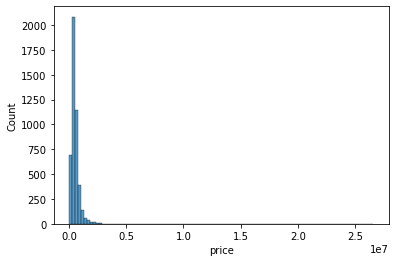

In [25]:
sns.histplot(data=df, x = 'price', bins=100)
plt.show()

- The price variable tends to show skewness to the right, due to the large number of houses that price less than 5.000.000
- The second most highest price purchased, is 1 items which almost reached 12.899.000, then the third, is 7.062.500

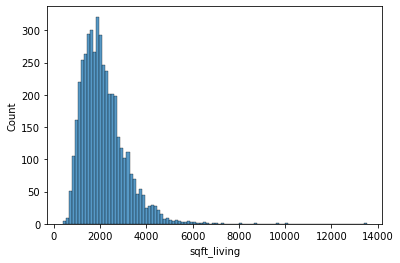

In [26]:
sns.histplot(data=df, x = 'sqft_living', bins=100)
plt.show()

* The histogram for this sqft living shows that many house skew on right side, there are several outliers

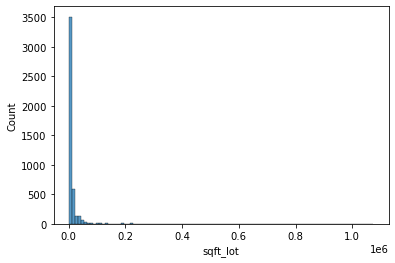

In [27]:
sns.histplot(data=df, x = 'sqft_lot', bins=100)
plt.show()

* The histogram for this sqft lot shows that many house skew on right side, there are several outliers

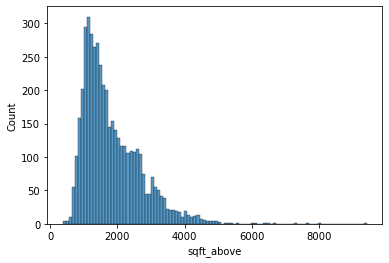

In [28]:
sns.histplot(data=df, x = 'sqft_above', bins=100)
plt.show()

* The histogram for this sqft above shows that many house skew on right side, there are several outliers

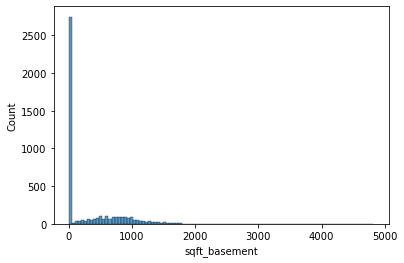

In [29]:
sns.histplot(data=df, x = 'sqft_basement', bins=100)
plt.show()

* The histogram for this sqft basement shows that many house skew on right side, there are several outliers

💡 *What we to know*<br>
4. Association between price and condition

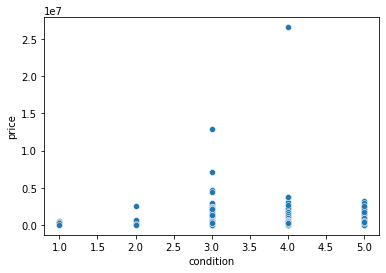

In [30]:
sns.scatterplot(data=df, y='price', x='condition')
plt.show()

There is almost no visible relationship between price and condition.

what about the correlation value between the two?

In [31]:
df[['price','condition']].corr()

,price,condition
price,1.000000,0.034915
condition,0.034915,1.000000


- The correlation value is 0.035, there is a positive relationship between price and condition, meaning that the good condition tend to sold in highest price and vice versa.
- The value of 0.035 means that the two variables have a weak relationship, meaning that there is not too much visible linear pattern in the two variables.

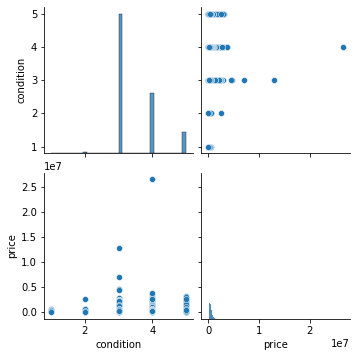

In [32]:
sns.pairplot(df[['condition','price']])
plt.show()

💡 *What we to know*<br>
5. Association between price and yr built/yr renovated

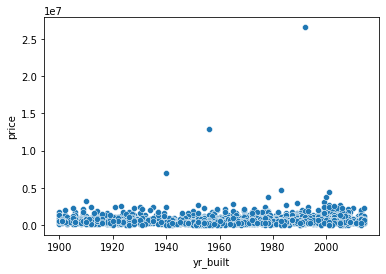

In [33]:
sns.scatterplot(data=df, y='price', x='yr_built')
plt.show()

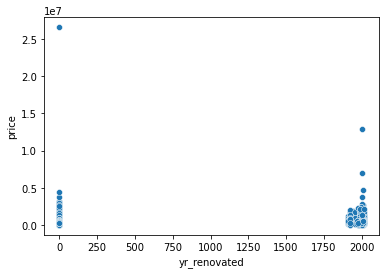

In [34]:
sns.scatterplot(data=df, y='price', x='yr_renovated')
plt.show()

There is almost no visible relationship between price and year built / year renovated.

what about the correlation value between the three?

In [35]:
df[['price','yr_built', 'yr_renovated']].corr()

,price,yr_built,yr_renovated
price,1.000000,0.021857,-0.028774
yr_built,0.021857,1.000000,-0.321342
yr_renovated,-0.028774,-0.321342,1.000000


- The correlation value is 0.022, there is a positive relationship between price and year built, meaning that the newer year built tend to sold in highest price and vice versa.
- The correlation value is -0.029, there is a negativ relationship between price and year renovated, meaning that the newer year renovated tend to sold in lowest price and vice versa.
- The correlation value is -0.321, there is a negative relationship between year built and year renovated, meaning that the newer year built tend to less have renovated and vice versa.
- The value of 0.022, -0.029, -0.321 means that the three variables have a weak relationship, meaning that there is not too much visible linear pattern in the three variables.

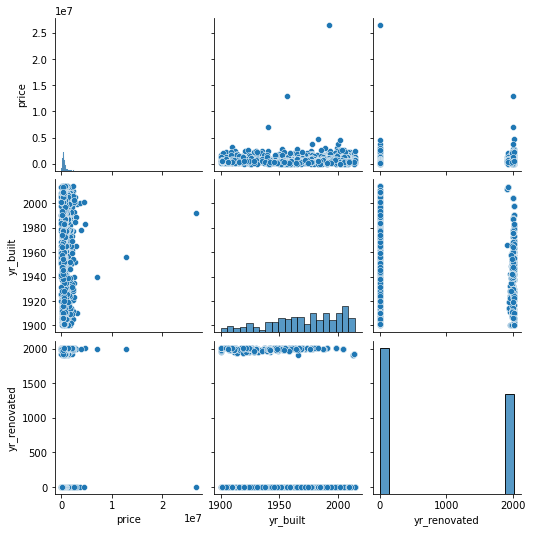

In [36]:
sns.pairplot(df[['price','yr_built','yr_renovated']])
plt.show()

💡 *What we to know*<br>
6. Association between price and sqft_living, sqft_lot, sqft_above, and sqft_basement

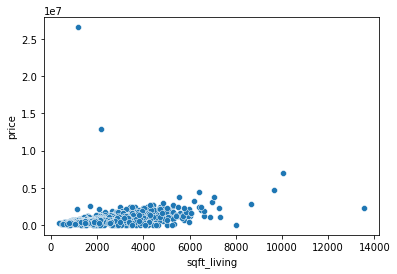

In [37]:
sns.scatterplot(data=df, y='price', x='sqft_living')
plt.show()

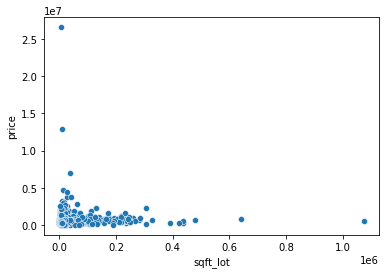

In [38]:
sns.scatterplot(data=df, y='price', x='sqft_lot')
plt.show()

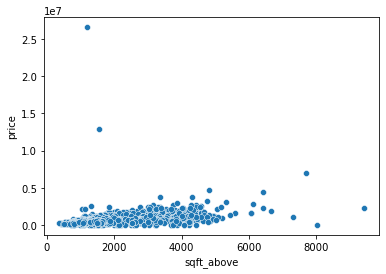

In [39]:
sns.scatterplot(data=df, y='price', x='sqft_above')
plt.show()

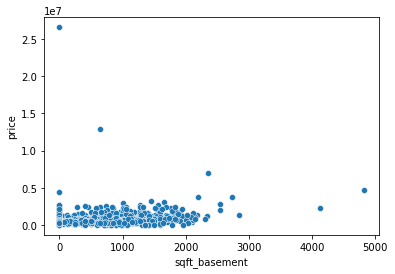

In [40]:
sns.scatterplot(data=df, y='price', x='sqft_basement')
plt.show()

There is almost no visible relationship between price and all sqft feature.

what about the correlation value between those?

In [41]:
df[['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement
price,1.000000,0.430410,0.050451,0.367570,0.210427
sqft_living,0.430410,1.000000,0.210538,0.876443,0.447206
sqft_lot,0.050451,0.210538,1.000000,0.216455,0.034842
sqft_above,0.367570,0.876443,0.216455,1.000000,-0.038723
sqft_basement,0.210427,0.447206,0.034842,-0.038723,1.000000


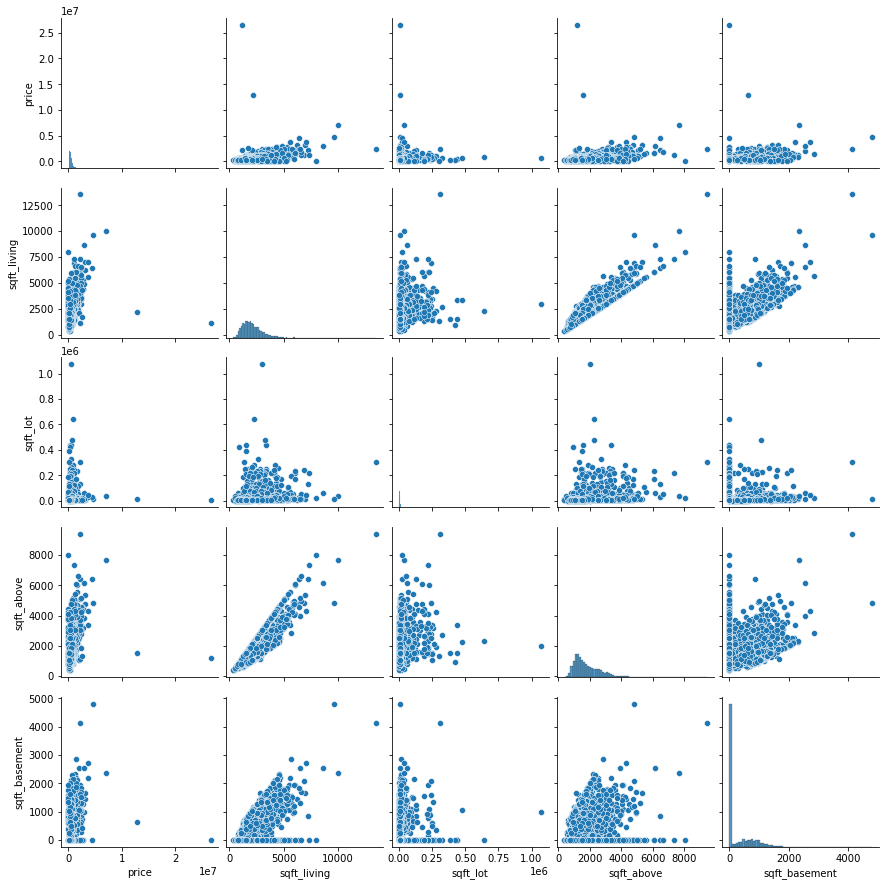

In [43]:
sns.pairplot(df[['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']])
plt.show()

### Categorical Variables

for categorical type data, we understand better if it is in the form of visualization. We can use barplot.

💡 *What we to know*<br>
7. Association between price and bedrooms, bathrooms, floors, waterfont, and view

In [44]:
df[['price','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view']].corr()

,price,bedrooms,bathrooms,floors,waterfront,view
price,1.000000,0.200336,0.327110,0.151461,0.135648,0.228504
bedrooms,0.200336,1.000000,0.545920,0.177895,-0.003483,0.111028
bathrooms,0.327110,0.545920,1.000000,0.486428,0.076232,0.211960
floors,0.151461,0.177895,0.486428,1.000000,0.022024,0.031211
waterfront,0.135648,-0.003483,0.076232,0.022024,1.000000,0.360935
view,0.228504,0.111028,0.211960,0.031211,0.360935,1.000000


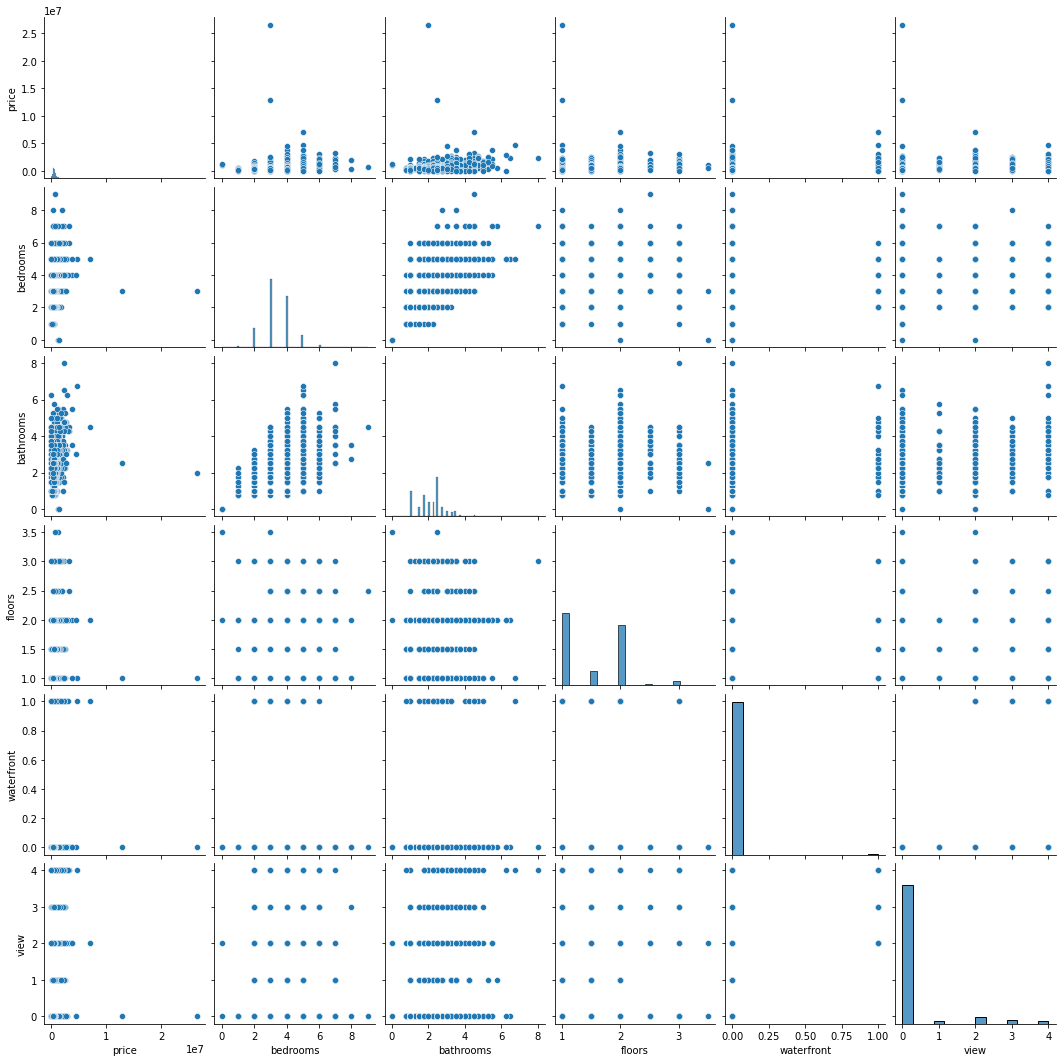

In [45]:
sns.pairplot(df[['price','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view']])
plt.show()

💡 *What we to know*<br>
8. Which city that give highest and lowest price?

In [46]:
dfCityHouses = pd.DataFrame(data={"city" : df["city"].value_counts(normalize=True).index,
                                  "Percentage Houses" : df["city"].value_counts(normalize=True).values*100})
dfCityHouses.head()

,city,Percentage Houses
0,Seattle,34.195652
1,Renton,6.369565
2,Bellevue,6.217391
3,Redmond,5.108696
4,Issaquah,4.065217


In [47]:
dfCityHouses.tail()

,city,Percentage Houses
39,Preston,0.043478
40,Milton,0.043478
41,Inglewood-Finn Hill,0.021739
42,Snoqualmie Pass,0.021739
43,Beaux Arts Village,0.021739


* Seattle is the city that conducts the most houses price and the least is Beaux Arts Village

* Top 10 city with most transactions

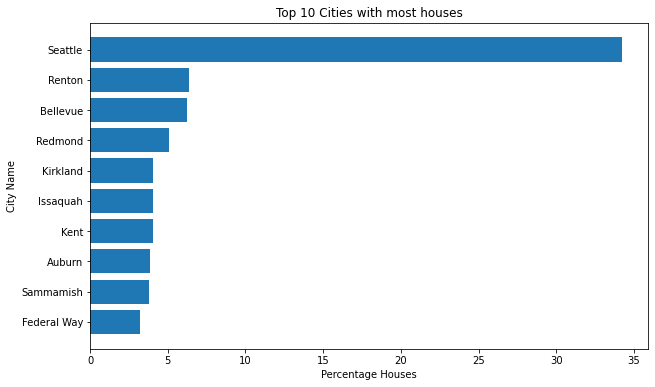

In [48]:
plt.figure(figsize = (10,6))
dfbarplot = dfCityHouses[:10].sort_values('Percentage Houses', ascending=True)
plt.barh(data = dfbarplot, y = 'city', width = 'Percentage Houses')
plt.title('Top 10 Cities with most houses')
plt.ylabel('City Name')
plt.xlabel('Percentage Houses')
plt.show()

### Categorical and Numerical Variables

💡 *What we to know*<br>
9. Which city that give highest and lowest price?

We can see a comparison of histograms from the Seattle and other cities from the figure below

In [49]:
df['is_Seattle'] = np.where(df['city'] == 'Seattle', 'Seattle', 'Not Seattle')

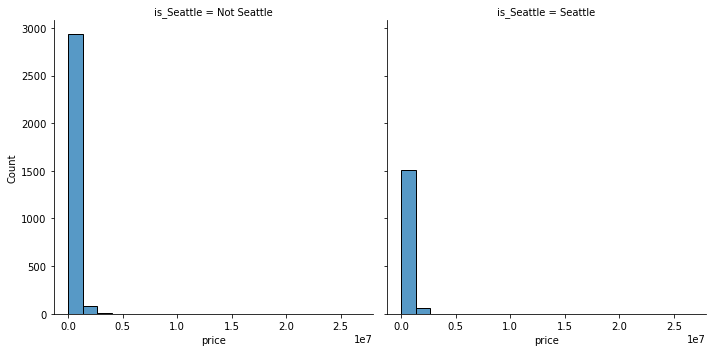

In [50]:
sns.displot(df, x= 'price', col='is_Seattle', bins=20)

For clearer plot results, the histogram for outside Seattle can be seen as follows

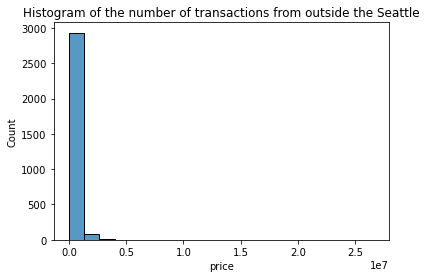

In [51]:
sns.histplot(df['price'].loc[df['is_Seattle']=='Not Seattle'], bins=20)
plt.title('Histogram of the number of transactions from outside the Seattle')
plt.show()

Next, we sum the total money from each city to get the 10 cities with the most price

In [52]:
dfCitybyPrice = df.groupby("city")[["price"]].sum().sort_values('price',ascending = False).reset_index()
dfCitybyPrice.head()

,city,price
0,Seattle,9.120843e+08
1,Bellevue,2.422937e+08
2,Redmond,1.568976e+08
3,Kirkland,1.218461e+08
4,Sammamish,1.202106e+08


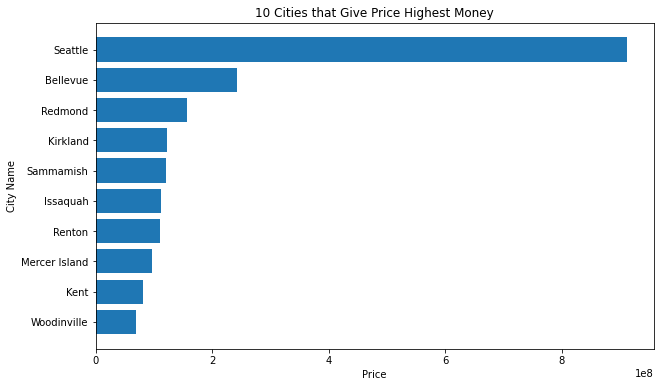

In [53]:
plt.figure(figsize = (10,6))
dfbarplot = dfCitybyPrice[:10].sort_values('price', ascending=True)
plt.barh(data = dfbarplot, y = 'city', width = 'price')
plt.title('10 Cities that Give Price Highest Money')
plt.ylabel('City Name')
plt.xlabel('Price')
plt.show()

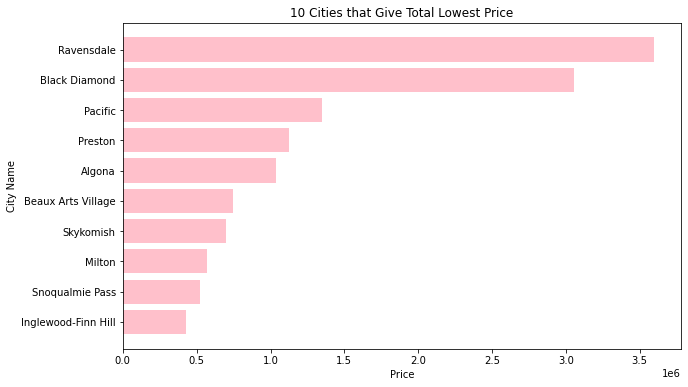

In [54]:
# Create Figure
plt.figure(figsize = (10,6))
dfbarplot = dfCitybyPrice.tail(10).sort_values('price', ascending=True)
plt.barh(data = dfbarplot, y = 'city', width = 'price', color='pink')
plt.title('10 Cities that Give Total Lowest Price')
plt.ylabel('City Name')
plt.xlabel('Price')
plt.show()

According to the chart "Top 10 Cities That Brings The Highest Price" in 2014 we can see that the Seattle is where we generate the majority of prices. 

We can take advantage of this by expanding there and offering promotions that are only available there. Additional study should be conducted to determine why sales are low in cities like Ravensdale and Inglendwood-Finn Hill, once we have that information, relevant solutions can be developed.

💡 *What we to know*<br>
10. How was the price trend over the months?

In [55]:
# change data type of 'Date' to datetime to processed datetime variable easily
dateFormat = '%Y-%m-%d'
df['date'] = pd.to_datetime(df['date'],format = dateFormat)
# Create New Columns : Month
df['Month'] = pd.DatetimeIndex(df['date']).month

[Text(0.5, 1.0, 'Transaction Each Month in 2014')]

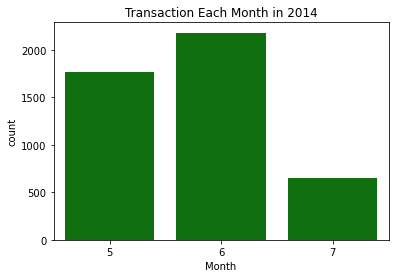

In [56]:
sns.countplot(x = df["Month"], color="green").set(title='Transaction Each Month in 2014')

*   Most transactions occurred in June
*   The fewest transactions occurred in July

## 2. Perform Statistical Inferential Test

💡 *What we to know*<br>
11. Is average of price in highest city price house are same with other?

Stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Average price of houses in Seattle and non Seattle are equal. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Average price of houses in Seattle and non Seattle are not equal.
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

In [57]:
import numpy as np

data_group1 = df[df['is_Seattle']=="Seattle"]['price'].values
data_group2 = df[df['is_Seattle']=="Not Seattle"]['price'].values

# variance 
np.var(data_group1), np.var(data_group2)

(213990561260.462, 371193143025.7753)

Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.



*   To calculate two sample proportion z test, we can use stats.ttest_ind
1. import library 
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
3.The function will be able to return 2 output, namely statistic test and p_value.






In [58]:
from scipy import stats
result = stats.ttest_ind(a = data_group1, 
                         b = data_group2, 
                         equal_var=False, 
                         alternative = "greater")

In [59]:
result.pvalue

0.004246194970798899

In [60]:
result.statistic

2.6331455515876985

The next step is to make decision rules by which we can know our hypothesis will be either rejected or fail to reject.

In [61]:
# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


Degree of freedom from two-samples

In [62]:
df_data = len(data_group1)+len(data_group2)-2
df_data

4598

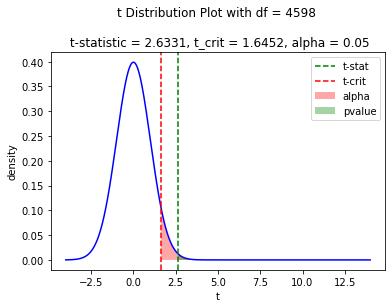

In [63]:
# plot sample distribution 
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

After that, we will compute confidence level for the difference in means



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller` 
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [64]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_group1), 
                  d2 = DescrStatsW(data=data_group2))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 10819.974504781188 73899.28715488408 ]


Based on the result, we can 95% confident that the average difference the price in Seattle and non Seattle lies between 10.819,97 and 73.899,28.

- As the p value < alpha(0.05) , we reject $H_0$. Therefore, we can say that average price in both Seattle and non-Seattle is not equal. 

- As confidence interval lies between 10.819,97 and 73.899,28, there is significant different between average price in Seattle then other days

💡 *What we to know*<br>
11. Is average of price in best condition (5) price house are same with other?

Stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Average price of houses with best condition and others are equal. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Average price of houses with best condition and others are not equal.
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

In [65]:
import numpy as np

# best condition houses
data_group3 = df[df['condition']==5]['price'].values

# other condition houses
data_group4 = df[df['condition']!=5]['price'].values

# variance 
np.var(data_group1), np.var(data_group2)

(213990561260.462, 371193143025.7753)

Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.



*   To calculate two sample proportion z test, we can use stats.ttest_ind
1. import library 
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
3.The function will be able to return 2 output, namely statistic test and p_value.






In [66]:
from scipy import stats
result = stats.ttest_ind(a = data_group3, 
                         b = data_group4, 
                         equal_var=False, 
                         alternative = "greater")

In [67]:
result.pvalue

1.6445456265691765e-05

In [68]:
result.statistic

4.183756575346761

The next step is to make decision rules by which we can know our hypothesis will be either rejected or fail to reject.

In [69]:
# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


Degree of freedom from two-samples

In [70]:
df_data = len(data_group3)+len(data_group4)-2
df_data

4598

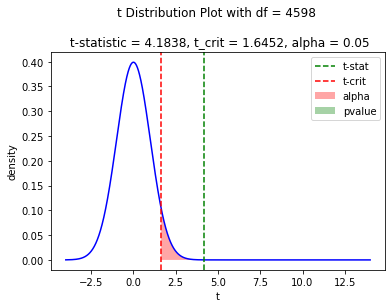

In [71]:
# plot sample distribution 
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

After that, we will compute confidence level for the difference in means



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller` 
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [72]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_group3), 
                  d2 = DescrStatsW(data=data_group4))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 49857.11577400887 138071.0164753935 ]


Based on the result, we can 95% confident that the average difference the price in good condition and other condition houses lies between 49.857,11 and 138.071,01.

- As the p value < alpha(0.05) , we reject $H_0$. Therefore, we can say that average price in both good condition and other is not equal. 

- As confidence interval lies between 49.857,11 and 138.071,01, there is significant different between average price in both good condition and other

## E. Regression Model

Based on statistical test, we conclude there are some feature that have most biggest correlation to price, such as:
- sqft_living	
- sqft_above

### 1. Single Predictor Regression Model

#### A. Using sqft living as predictors

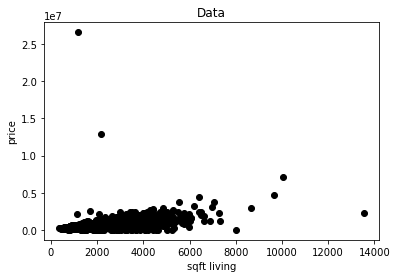

In [101]:
import matplotlib.pyplot as plt

x = df["sqft_living"]
y = df["price"]

# Plot the data
plt.scatter(x, y, color = "k")

# Add a legend and labels

plt.xlabel("sqft living")
plt.ylabel("price")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

#### Mean of price

We can directly calculation the mean with usual calculation

In [102]:
np.mean(df['price'])

551962.9884732141

#### Handling Outliers

To make better regression model, we drop some data than become outliers because it can distract the regression model and reduce the performance of model

In [103]:
df_new = df[df["price"] <= 5e6]
df_new = df_new[df_new["sqft_living"] <= 8000]

#### Scaling for better unit

In [198]:
df_new['priceK'] = df_new['price']/1000 

- Under regression model you can also get this value by asssigning the constant term (no predictor) as predictor.

In [218]:
# Create OLS model object
model = smf.ols("priceK ~ sqft_living", df_new)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price = print_coef_std_err(results)

- Visualize the data and regression line

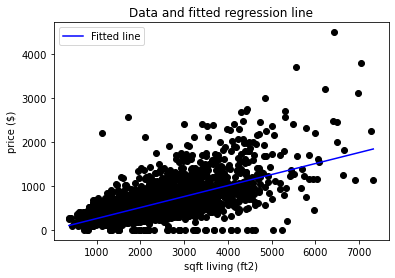

In [219]:
predictor = "sqft_living"
outcome = "priceK"
data = df_new.copy()
results_ = results_price.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("price ($)")
plt.xlabel("sqft living (ft2)")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### Coefficient Interpretation

In [106]:
results_price

,coef,std err
Intercept,7776.690361,9723.360357
sqft_living,249.999480,4.184676


In [315]:
results.rsquared

0.43738199972941794

$$\text{price} = 7776.69 + 249.99\text{sqft_living}$$

- The average of the price from 0 sqft above is `$7776.69`
- the difference between average price of it condition house is `$249.99`, with the house that has bigger sqft living have the higher price

#### Residual Plot and Explained Variance

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

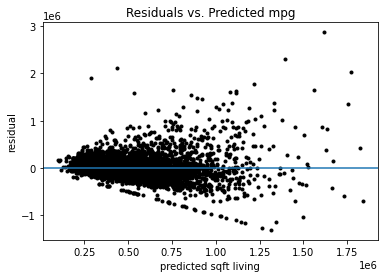

In [107]:
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted sqft living")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

In [108]:
results.rsquared

0.4373819997294178

The residuals produce a noticeable pattern make the lack of fit more apperent eventhough the fitted line explain more than two-thirds (44%) of variation in sqft_living

- The residual we get, have unconstant pattern around the zero
- Lets try use weighted regression to address this issue, and see what happening
- Give the lower weight in the data that have high variance, so set the weight inverse proportional of the predictor as we see that, the variance increase as the sqrt living increase 

#### Normality of error assumption 

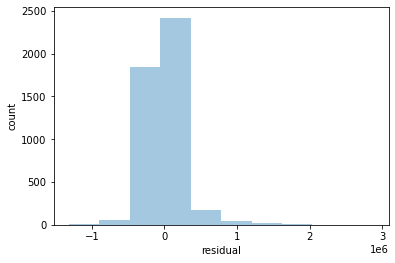

In [109]:
plt.hist(results.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

#### Fit Linear Regression - Using One Over Square on sqft_living Variable

In [198]:
df_new['priceK'] = df_new['price']/1000 

In [199]:
# set the weight as 1 over squared sqft_living

df_new["onsq_sqft_living"] = 1/(df_new["sqft_living"]**2)

In [200]:
weights = 1/(df_new["sqft_living"]**2)

In [208]:
# Create OLS model object
model = smf.ols("priceK ~ onsq_sqft_living", df_new)

# Fit the model
results_onsqtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_living_onsq = print_coef_std_err(results_logtransform)

In [209]:
results_onsqtransform.rsquared

0.13928850185700925

#### Fit Linear Regression - Using Log Transform on sqft_living Variable

In [210]:
df_new['log_sqft_living'] = np.log(df_new["sqft_living"])
df_new.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city,statezip,country,onsq_sqft_living,log_sqft_living,rec_sqft_living,onsq_sqft_above,log_sqft_above,rec_sqft_above,priceK
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,Shoreline,WA 98133,USA,5.569169e-07,7.200425,0.000746,5.569169e-07,7.200425,0.000746,313.0
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,...,Seattle,WA 98119,USA,7.506099e-08,8.202482,0.000274,8.805220e-08,8.122668,0.000297,2384.0
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,...,Kent,WA 98042,USA,2.684636e-07,7.565275,0.000518,2.684636e-07,7.565275,0.000518,342.0


In [211]:
# Create OLS model object
model = smf.ols("priceK ~ log_sqft_living", df_new)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_living_log = print_coef_std_err(results_logtransform)

In [212]:
results_logtransform.rsquared

0.3575847610941306

#### Fit Linear Regression - Using Reciprocal Transform on sqft_living Variable

In [213]:
df_new['rec_sqft_living'] = 1/df_new["sqft_living"]
df_new.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city,statezip,country,onsq_sqft_living,log_sqft_living,rec_sqft_living,onsq_sqft_above,log_sqft_above,rec_sqft_above,priceK
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,Shoreline,WA 98133,USA,5.569169e-07,7.200425,0.000746,5.569169e-07,7.200425,0.000746,313.0
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,...,Seattle,WA 98119,USA,7.506099e-08,8.202482,0.000274,8.805220e-08,8.122668,0.000297,2384.0
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,...,Kent,WA 98042,USA,2.684636e-07,7.565275,0.000518,2.684636e-07,7.565275,0.000518,342.0


In [214]:
# Create OLS model object
model = smf.ols("priceK ~ rec_sqft_living", df_new)

# Fit the model
results_rectransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_living_rec = print_coef_std_err(results_rectransform)

In [215]:
results_rectransform.rsquared

0.24712279862419206

#### Fit Linear Regression - Weighted Least Square

In [316]:
# Create WLS (Weighted Least Square) model object and include the weight
model = smf.wls("priceK ~ sqft_living", df_new, weights = weights)

# Fit the model
results2 = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_lot_weighted = print_coef_std_err(results2)

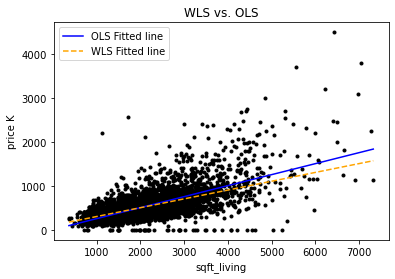

In [317]:
predictor = "sqft_living"
outcome = "priceK"
data = df_new.copy()
results_1 = results_price.copy()
results_2 = results_lot_weighted.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat1 = results_1.loc["Intercept"]["coef"]
b_hat1 = results_1.loc[predictor]["coef"]

# Calculate the fitted values
a_hat2 = results_2.loc["Intercept"]["coef"]
b_hat2 = results_2.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values1 = a_hat1 + b_hat1 * x_domain
fitted_values2 = a_hat2 + b_hat2 * x_domain


# Plot the fitted line
plt.plot(x_domain, fitted_values1, label="OLS Fitted line", color = "b")

# Plot the fitted line
plt.plot(x_domain, fitted_values2, label="WLS Fitted line", color = "orange", linestyle = "--")

# Add a legend and labels
plt.legend()
plt.ylabel("price K")
plt.xlabel("sqft_living")

# Add a title and adjust the margins
plt.title("WLS vs. OLS")

# Show the plot
plt.show()

The weighted residual plot

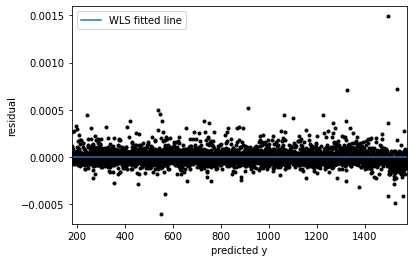

In [221]:
# plot the predicted values, and the residual
plt.scatter(fitted_values2, results2.resid * weights, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="WLS fitted line")

plt.xlim(min(fitted_values2), max(fitted_values2))
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()
plt.show()

In [318]:
results2.rsquared

0.3589666510317273

- Check the pattern in the data using visualization
- Form the visualization itself, the good condition tend to have higher price than the bad condition

#### B. Using sqft above as predictors

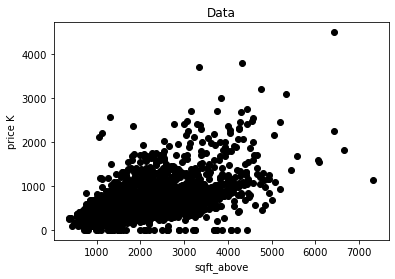

In [223]:
x = df_new['sqft_above']
y = df_new['priceK']

# Plot the data
plt.scatter(x, y, color = "k")

# Add a legend and labels

plt.xlabel("sqft_above")
plt.ylabel("price K")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

### Fit Linear Regression

In [338]:
# Create OLS model object
model = smf.ols('priceK ~ sqft_above', df_new)

# Fit the model
results3 = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_above_price = print_coef_std_err(results3)

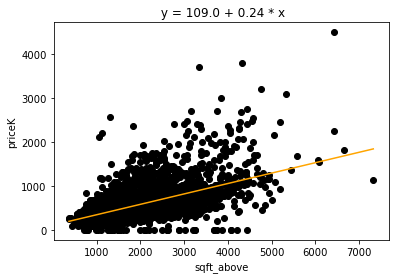

In [339]:
predictor = "sqft_above"
outcome = "priceK"
data = df_new.copy()
results_ = results_sqft_above_price.copy()

# scatter-plot data
x = df_new['sqft_above']
y = df_new['priceK']

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "orange")

plt.ylabel("priceK")
plt.xlabel("sqft_above")
plt.title(f" y = {np.round(a_hat)} + {np.round(b_hat, 2)} * x")

plt.show()

#### Coefficient Interpretation

In [292]:
results_sqft_above_price

,coef,std err
Intercept,7.776690,9.723360
sqft_living,0.249999,0.004185


$$y = 7.77 + 0.25 x$$

- The average of the price from 0 sqft above is `$7.77`
- the difference between average price of it condition house is `$0.25`, with the house that has bigger sqft above have the higher price

#### Residual Plot and Explained Variance

Text(0.5, 1.0, 'Residuals vs. Predicted')

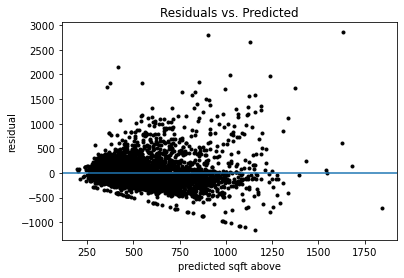

In [320]:
plt.scatter(results3.fittedvalues, results3.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted sqft above")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted")

In [293]:
results3.rsquared

0.324366354203231

The residuals produce a noticeable pattern make the lack of fit more apperent eventhough the fitted line explain more than two-thirds (34%) of variation in sqft_above

- The residual we get, have unconstant pattern around the zero
- Lets try use weighted regression to address this issue, and see what happening
- Give the lower weight in the data that have high variance, so set the weight inverse proportional of the predictor as we see that, the variance increase as the lot increase 

#### Normality of error assumption 

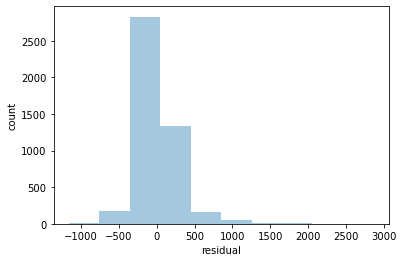

In [321]:
plt.hist(results3.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

### Fit Linear Regression - Using One Over Square on sqft_above Variable

In [294]:
# set the weight as 1 over squared sqft_living

df_new["onsq_sqft_above"] = 1/(df_new["sqft_above"]**2)

In [295]:
weights2 = 1/(df_new["sqft_above"]**2)

In [296]:
# Create OLS model object
model = smf.ols("priceK ~ onsq_sqft_above", df_new)

# Fit the model
results_onsqtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_above_onsq = print_coef_std_err(results_logtransform)

In [297]:
results_onsqtransform.rsquared

0.1413060412077365

#### Fit Linear Regression - Using Log Transform on sqft_above Variable

In [298]:
df_new['log_sqft_above'] = np.log(df_new["sqft_above"])
df_new.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,onsq_sqft_living,log_sqft_living,rec_sqft_living,onsq_sqft_above,log_sqft_above,rec_sqft_above,priceK,z_price,z_sqft_living,z_sqft_above
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,5.569169e-07,7.200425,0.000746,5.569169e-07,7.200425,0.000746,313.0,-0.649824,-0.853987,-0.571549
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,...,7.506099e-08,8.202482,0.000274,8.805220e-08,8.122668,0.000297,2384.0,5.265005,1.639935,1.837562
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,...,2.684636e-07,7.565275,0.000518,2.684636e-07,7.565275,0.000518,342.0,-0.566999,-0.217011,0.128636


In [299]:
# Create OLS model object
model = smf.ols("priceK ~ log_sqft_above", df_new)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_above_log = print_coef_std_err(results_logtransform)

In [300]:
results_logtransform.rsquared

0.2798682953216537

#### Fit Linear Regression - Using Reciprocal Transform on sqft_above Variable

In [301]:
df_new['rec_sqft_above'] = 1/df_new["sqft_above"]
df_new.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,onsq_sqft_living,log_sqft_living,rec_sqft_living,onsq_sqft_above,log_sqft_above,rec_sqft_above,priceK,z_price,z_sqft_living,z_sqft_above
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,5.569169e-07,7.200425,0.000746,5.569169e-07,7.200425,0.000746,313.0,-0.649824,-0.853987,-0.571549
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,...,7.506099e-08,8.202482,0.000274,8.805220e-08,8.122668,0.000297,2384.0,5.265005,1.639935,1.837562
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,...,2.684636e-07,7.565275,0.000518,2.684636e-07,7.565275,0.000518,342.0,-0.566999,-0.217011,0.128636


In [302]:
# Create OLS model object
model = smf.ols("priceK ~ rec_sqft_above", df_new)

# Fit the model
results_rectransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_above_rec = print_coef_std_err(results_rectransform)

In [303]:
results_rectransform.rsquared

0.21453176921424832

#### Fit Linear Regression - Weighted Least Square

In [340]:
# Create WLS (Weighted Least Square) model object and include the weight
model = smf.wls("priceK ~ sqft_above", df_new, weights = weights2)

# Fit the model
results4 = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_above_weighted = print_coef_std_err(results4)

In [341]:
results4.rsquared

0.2402881491196872

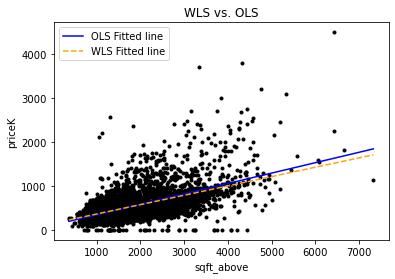

In [342]:
predictor = "sqft_above"
outcome = "priceK"
data = df_new.copy()
results_1 = results_sqft_above_price.copy()
results_2 = results_above_weighted.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat1 = results_1.loc["Intercept"]["coef"]
b_hat1 = results_1.loc[predictor]["coef"]

# Calculate the fitted values
a_hat2 = results_2.loc["Intercept"]["coef"]
b_hat2 = results_2.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values1 = a_hat1 + b_hat1 * x_domain
fitted_values2 = a_hat2 + b_hat2 * x_domain


# Plot the fitted line
plt.plot(x_domain, fitted_values1, label="OLS Fitted line", color = "b")

# Plot the fitted line
plt.plot(x_domain, fitted_values2, label="WLS Fitted line", color = "orange", linestyle = "--")

# Add a legend and labels
plt.legend()
plt.ylabel("priceK")
plt.xlabel("sqft_above")

# Add a title and adjust the margins
plt.title("WLS vs. OLS")

# Show the plot
plt.show()

The weighted residual plot

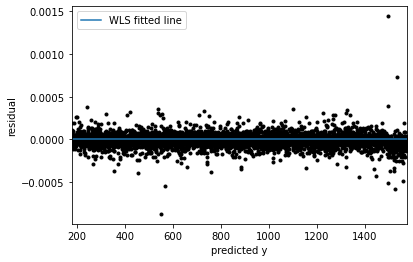

In [307]:
# plot the predicted values, and the residual
plt.scatter(fitted_values2, results4.resid * weights, 
            marker = ".", 
            color = "k")

# Plot the fitted line as horizontal line at zero
plt.axhline(0, label="WLS fitted line")

plt.xlim(min(fitted_values2), max(fitted_values2))
plt.ylabel("residual")
plt.xlabel("predicted y")
plt.legend()
plt.show()

#### C. Fit Linear Regression - Include Both Variables

- Now, We want to predict price from both sqft above and sqft living
- Use `+` to add another predictors in the model

In [308]:
# Create OLS model object
model = smf.ols("priceK ~ sqft_above + sqft_living", df_new)

# Fit the model
resultscomb = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_comb = print_coef_std_err(resultscomb)

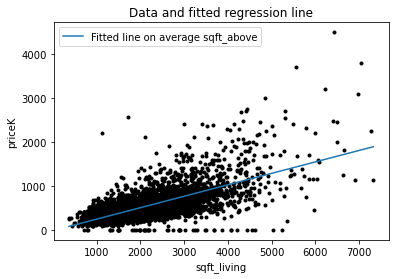

In [347]:
predictors = ["sqft_living","sqft_above"]
outcome = "priceK"
data = df_new.copy()
results_ = results_price_comb.copy()

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values = beta0_hat +  beta1_hat * x_domain  + beta2_hat * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values, label = f"Fitted line on average sqft_above")

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### Coefficient Interpretation

In [309]:
results_price_comb

,coef,std err
Intercept,9.469439,9.799354
sqft_above,-0.012999,0.009412
sqft_living,0.260317,0.008562


In [323]:
resultscomb.rsquared

0.43761569686899704

$$\text{price} = 9.47 + -0.01\text{sqft_above} + 0.26\text{sqft_living}$$

#### D. Fit Linear Regression - Include an Interaction

In [310]:
# Create OLS model object
model = smf.ols("priceK ~ sqft_living + sqft_above + sqft_living:sqft_above", df_new)

# Fit the model
resultscombin = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_inter = print_coef_std_err(resultscombin)

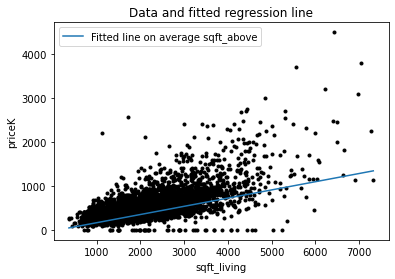

In [346]:
predictors = ["sqft_living","sqft_above"]
outcome = "priceK"
data = df_new.copy()
results_ = results_price_inter.copy()

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values = beta0_hat +  beta1_hat * x_domain  + beta2_hat * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values, label = f"Fitted line on average sqft_above")

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### Coefficient Interpretation

In [312]:
results_price_inter

,coef,std err
Intercept,196.246839,19.245518
sqft_living,0.186430,0.010710
sqft_above,-0.119390,0.013270
sqft_living:sqft_above,0.000036,0.000003


In [261]:
resultscombin.rsquared

0.45264248060152923

$$\text{price} = 196.25 + 0.186\text{sqft_living} -0.119\text{sqft_above} + 0.000036\text{sqft_living x sqft_above}$$

- The intercept represents the average price for houses which has 0 sqft above and 0 sqft living is—not a meaningful scenario, we can discuss later to centering the predictor to interpret this better

- The coefficient of sqft living, 0.186: The difference between the predicted price for 
  - houses which is sqft above is 0, and 
  This coefficient is not easily interpretable
  
- The coefficient of sqft_living, 1: The comparison of average prices across houses which house has sqft above 0, but differ by 1 point in sqft above. *This is the slope of the blue line*

- the coefficient on the interaction term, 0.000036 : represents the difference in the slope for sqft_living, comparing sqft_above. *It’s, the difference between the slopes of the green and blue lines*



#### E. Transformation Features

#### 1. Improve Coefficient Interpretation by Standardization sqft_living

In [267]:
sqft_living_mean = df_new["sqft_living"].mean()
sqft_living_std = df_new["sqft_living"].std()
sqft_living = df_new["sqft_living"]

df_new["z_sqft_living"] = (sqft_living-sqft_living_mean)/sqft_living_std

In [268]:
print(f"standard deviation of sqft_living = {sqft_living_std}")

standard deviation of sqft_living = 926.252112192116


#### 2. Improve Coefficient Interpretation by Standardization sqft_above

In [273]:
sqft_above_mean = df_new["sqft_above"].mean()
sqft_above_std = df_new["sqft_above"].std()
sqft_above = df_new["sqft_above"]

df_new["z_sqft_above"] = (sqft_above-sqft_above_mean)/sqft_above_std

In [274]:
print(f"standard deviation of sqft_above = {sqft_above_std}")

standard deviation of sqft_above = 842.6343614950046


#### Fit Linear Regression

In [278]:
# Create OLS model object
model = smf.ols("priceK ~ z_sqft_living + z_sqft_above + z_sqft_living:z_sqft_above", df_new)

# Fit the model
results_z_sqft_living = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sqft_living_std = print_coef_std_err(results_z_sqft_living)

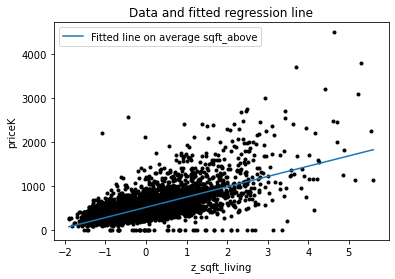

In [348]:
predictors = ["z_sqft_living","z_sqft_above"]
outcome = "priceK"
data = df_new.copy()
results_ = results_sqft_living_std.copy()

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values = beta0_hat +  beta1_hat * x_domain  + beta2_hat * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values, label = f"Fitted line on average sqft_above")

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### Coefficient Interpretation

In [279]:
results_sqft_living_std

,coef,std err
Intercept,515.985353,4.404593
z_sqft_living,233.505292,7.854441
z_sqft_above,-35.870987,8.133914
z_sqft_living:z_sqft_above,28.135713,2.506695


#### Comparing estimates to assumed parameter values

If the model correct, we can get the interval of estimated coefficients under normal distribution assumption using standard error from the model

In [324]:
results_sqft_living_std["upp_est_95"] = results_sqft_living_std.loc[:,"coef"] - (2 * results_sqft_living_std.loc[:,"std err"])
results_sqft_living_std["low_est_95"] = results_sqft_living_std.loc[:,"coef"] + (2 * results_sqft_living_std.loc[:,"std err"])

In [325]:
results_sqft_living_std

,coef,std err,upp_est_95,low_est_95
Intercept,515.985353,4.404593,507.176167,524.794538
z_sqft_living,233.505292,7.854441,217.796411,249.214174
z_sqft_above,-35.870987,8.133914,-52.138814,-19.603160
z_sqft_living:z_sqft_above,28.135713,2.506695,23.122324,33.149103


$$\text{price} = 515.98 + 515.99 x \text{z_sqft_living} -35.87 x \text{z_sqft_above} + 28.14 x \text{z_sqft_living x z_sqft_above}$$

- This model has the intercept value of 515.98 K and z_sqft_living coefficient of 233.51 K. 
- We interpret these values based on the specified standardization parameters, which in this case is **mean and standard deviation of height, globally**. 

The interpretations for these values are:

- Based on our data, house have average sqft living and average sqft above has price 515.98 K on average
- House which average sqft living one global standard deviation, 223 K higher price and average sqft above one point have on average -35 K more

In [280]:
results_z_sqft_living.rsquared

0.45264248060152934

- The performance of before and after standardization of linear regression model is approximately the same
- So, the linear transformation such as centering and z-score standardization do not affect model performance

### Insights and Recommendation

#### Insight
- As statistical inference by hypothesis testing, we can conclude that Seattle has more expensive houses that others city in USA by experiment
- As statistical inference by hypothesis testing, house at good condition tend to more expensive that the lower condition
- The two variables that have highest relation to price houses is sqft living and sqft above variables.
  - Based on our data, house have average sqft living and average sqft above has price `$ 515.98 K` on average
  - Comparing houses who have the same condition 1 sqft living, the biggest have `$233.50` higher price in average than the lowest one
- The model that have highest variance sqft living and sqft above variables, it explained 45% of variance of house prices

#### Recommendation
Since the higher the quality of a houses, the higher the premium will be. One of the indicator of higher quality is higher prices history. From the model we have sqft living and sqft above variables as two indicator that contribute to expected house prices

The broker houses company can give higher prices to houses who has bigger sqft living and bigger sqft above since they might have higher quality other houses


#### Limitation
The analysis taking into account only house prices and demographics variables, broker houses company may also consider broader factors such as market trends, regulatory requirements, and economic conditions when setting premium values.